In [15]:
import numpy as np
import pandas as pd
from rso import rso_clustering

In [16]:
print('Loading data...')
tf_idf = pd.read_csv('data/tfidf.csv')
print('Data loaded.')

terms = tf_idf.columns.values
tf_idf = np.array(tf_idf)

Loading data...
Data loaded.


In [17]:
def euc_distance(instance1, instance2):
    return np.linalg.norm(instance1 - instance2)

In [33]:
RSO_ITERATIONS = 20
n = tf_idf.shape[0]
k = 2
population, best_rat, cluster_assignments, convergence = rso_clustering.rso_clustering(instances=tf_idf,
        agents=15,
        k=k,
        min_bound=np.zeros((k,n)),
        max_bound=np.ones((k,n)),
        distance=euc_distance,
        max_steps=RSO_ITERATIONS
)


100%|██████████| 20/20 [02:30<00:00,  7.51s/it]


In [34]:
with open("results/csv/rso/best_rat_k{}.csv".format(k), "a+") as f:
        np.savetxt(f, best_rat, delimiter=";")

with open("results/csv/rso/convergence_k{}.csv".format(k), "a+") as f:
        for entry in convergence:
                f.write(str(entry[0]) + ";" + str(entry[1]) + "\n")

In [35]:
centroids = np.genfromtxt('results/csv/rso/best_rat_k{}.csv'.format(k), delimiter=';')
print("--------------------------------------------\nK = {}".format(k))
for k_index in range(len(centroids)):
    zipped = zip(terms, centroids[k_index])
    sorted_terms = sorted(zipped, key=lambda x: x[1], reverse=True)
    print(sorted_terms[:4])

--------------------------------------------
K = 2
[('fog', 0.11304134734388899), ('optic', 0.045033849599258435), ('flow', 0.04399329641939333), ('clean', 0.031503758450080147)]
[('pose', 0.062218655643283126), ('object', 0.0595707877733542), ('render', 0.05131804350301401), ('view', 0.030270153018197743)]


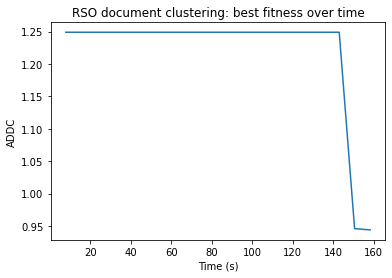

In [36]:
import matplotlib.pyplot as plt

with open("results/csv/rso/convergence_k{}.csv".format(k), "r") as f:
    lines = f.readlines()

time = []
fitness = []

for step in lines:
    split_line = step.strip().split(";")
    time.append(float(split_line[0]))
    fitness.append(round(float(split_line[1]), 3))
    
plt.plot(time, fitness)
        
plt.xlabel("Time (s)")
plt.ylabel("ADDC")
plt.title("RSO document clustering: best fitness over time")
plt.savefig("results/plots/demo_rso.png")
plt.show()